In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tampilan grafik yang lebih baik
sns.set(style="whitegrid")


In [2]:
data = pd.read_csv('ai4i2020.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

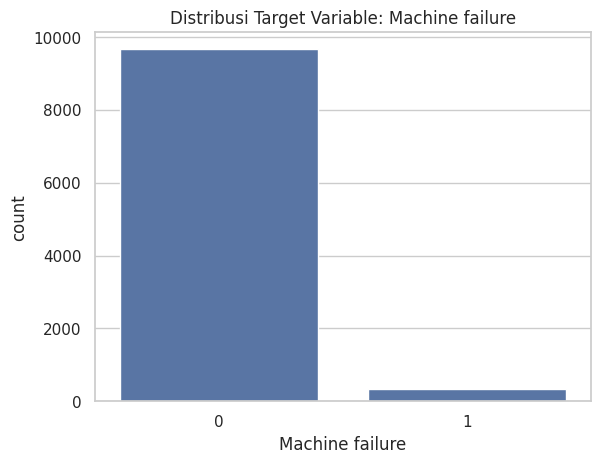

In [3]:
# Informasi umum tentang data
data.info()

# Statistik deskriptif
data.describe()

# Distribusi target variable 'Machine failure'
sns.countplot(x='Machine failure', data=data)
plt.title('Distribusi Target Variable: Machine failure')
plt.show()

In [4]:
# Memeriksa dan menangani nilai yang hilang
data.isnull().sum()

# Mengkodekan variabel kategorikal jika ada (dalam contoh ini tidak ada variabel kategorikal)

# Memisahkan fitur dan target
X = data.drop(['UDI', 'Product ID', 'Type', 'Machine failure'], axis=1)
y = data['Machine failure']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 1.00


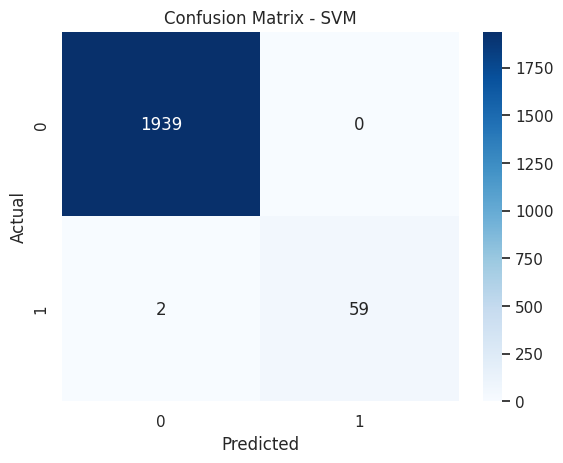

In [5]:
# Membuat dan melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Memprediksi pada data testing
y_pred_svm = svm_model.predict(X_test)

# Menampilkan laporan klasifikasi
print("Support Vector Machine (SVM)")
print(classification_report(y_test, y_pred_svm))

# Menampilkan akurasi
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}')

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [6]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc


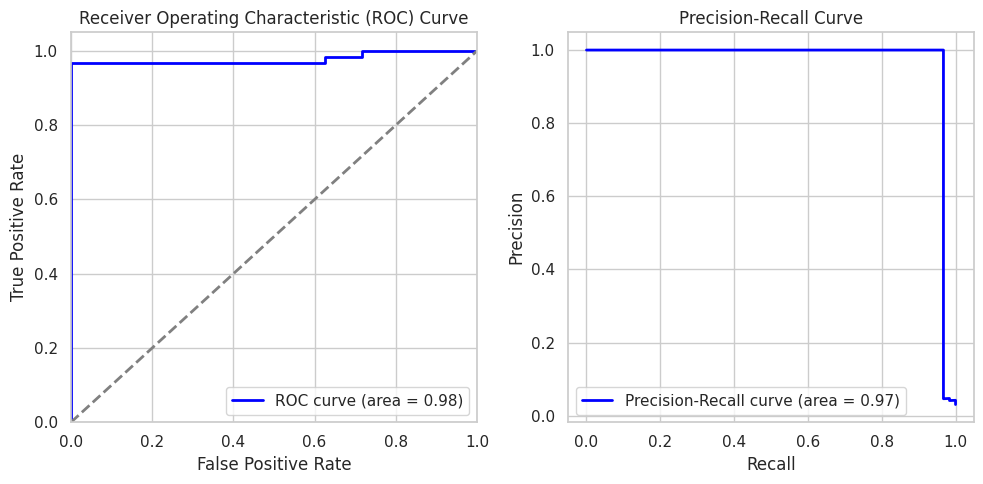

Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

Accuracy: 1.00


In [7]:
# Menggunakan SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 5))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_prob_svm)
pr_auc_svm = auc(recall_svm, precision_svm)

plt.subplot(1, 2, 2)
plt.plot(recall_svm, precision_svm, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc_svm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Menampilkan laporan klasifikasi
print("Support Vector Machine (SVM)")
print(classification_report(y_test, y_pred_svm))
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}')
